## Sarcasm Analysis

In [2]:
!pip install tensorflow_hub

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow_hub as hub
import json

# Load data from sarcasm.json
def load_json(json_file):
    data = []
    with open(json_file) as f:
        datastore = json.load(f)
    return pd.DataFrame(datastore)

json_file = 'sarcasm.json'

df = load_json(json_file)



In [5]:
# Tokenization and padding
vocab_size = 30000
max_len = 20

tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(df['headline'])

train_inputs = tokenizer.texts_to_sequences(df['headline'])
train_inputs = tf.keras.preprocessing.sequence.pad_sequences(train_inputs, maxlen=max_len, padding='post')

train_labels = df['is_sarcastic']



In [ ]:
# Splitting data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_inputs, train_labels, test_size=0.2, random_state=42)



In [ ]:
# Define LSTM model
embedding_dim = 128

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.GlobalMaxPool1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



In [6]:
# Training the model
history = model.fit(X_train, y_train, epochs=100, batch_size=256, 
                    validation_data=(X_val, y_val), verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val, verbose=0)
print(f"Validation Accuracy: {accuracy}")

# Function to predict sarcasm in user input
def predict_sarcasm(sentence):
    sequences = tokenizer.texts_to_sequences([sentence])
    padded = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_len, padding='post')
    prediction = model.predict(padded)[0][0]
    if prediction >= 0.5:
        return "Sarcastic"
    else:
        return "Not Sarcastic"



Epoch 1/100
84/84 [==============================] - 16s 116ms/step - loss: 0.5520 - accuracy: 0.6861 - val_loss: 0.3511 - val_accuracy: 0.8512
Epoch 2/100
84/84 [==============================] - 8s 92ms/step - loss: 0.2360 - accuracy: 0.9136 - val_loss: 0.3202 - val_accuracy: 0.8663
Epoch 3/100
84/84 [==============================] - 8s 89ms/step - loss: 0.1101 - accuracy: 0.9659 - val_loss: 0.4224 - val_accuracy: 0.8469
Epoch 4/100
84/84 [==============================] - 7s 88ms/step - loss: 0.0548 - accuracy: 0.9832 - val_loss: 0.5905 - val_accuracy: 0.8517
Epoch 5/100
84/84 [==============================] - 8s 90ms/step - loss: 0.0342 - accuracy: 0.9891 - val_loss: 0.6450 - val_accuracy: 0.8461
Epoch 6/100
84/84 [==============================] - 7s 89ms/step - loss: 0.0206 - accuracy: 0.9944 - val_loss: 0.8804 - val_accuracy: 0.8385
Epoch 7/100
84/84 [==============================] - 8s 91ms/step - loss: 0.0132 - accuracy: 0.9960 - val_loss: 0.9739 - val_accuracy: 0.8373
Epoc

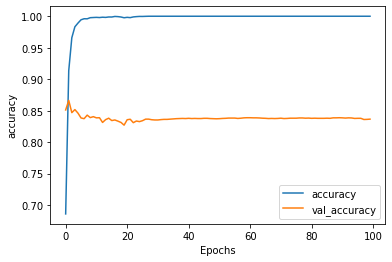

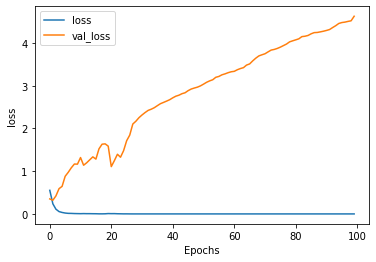

In [9]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
# Example usage:
user_input = input("Enter a sentence: ")
prediction = predict_sarcasm(user_input)
print(f"Prediction: {prediction}")
